In [19]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt

## Exercise 1

In [16]:
def condnum(A):
    σ = la.svd(A)[1]
    cnum = σ[0] / σ[-1]
    return cnum

A = np.random.rand(5, 5)

print("My number is close to scipys:", condnum(A) - np.linalg.cond(A))
Q = la.qr(A)[0]
print("Orthonormals have QR decomp of 1:", condnum(Q))

My number is close to scipys: 1.4210854715202004e-14
Orthonormals have QR decomp of 1: 1.0000000000000004


## Exercise 2

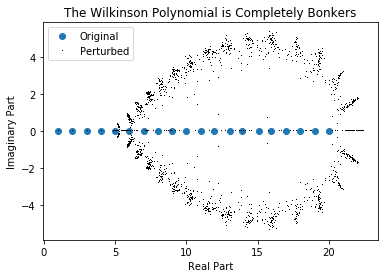

The estimated absolute condition number is 3.57444205215334e-9
The estimated relative condition number is 2467055010.53413


In [71]:
# Define wilkinson polynomial
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
# find roots
trueroots = np.roots(np.poly1d(w_coeffs))
# Plot (only real coeffs.)
plt.plot(trueroots, np.zeros(20), 'o', label = "Original")
# Initialize storage lists
acnlist = []
rcnlist = []
# Now loop over 100 perturbations
for i in range(100):
    #Initialize perturbation
    c = np.random.normal(1, 1e-10, 21)
    newcoeffs = w_coeffs * c
    newroots = np.roots(np.poly1d(newcoeffs))
    if i == 98:
        plt.plot(newroots.real, newroots.imag, 'k,', label = "Perturbed") 
        plt.xlabel("Real Part")
        plt.ylabel("Imaginary Part")
        plt.legend()
        plt.title("The Wilkinson Polynomial is Completely Bonkers")
    else:
        plt.plot(newroots.real, newroots.imag, 'k,') 
    #Estimate absolute cond. norm
    h = newcoeffs - w_coeffs
    acn = la.norm(newroots - trueroots, np.inf) / la.norm(h, np.inf)
    #Estimate Relative cond. norm
    rcn = acn * la.norm(w_coeffs, np.inf) / la.norm(trueroots, np.inf) 
    #Store
    acnlist = acnlist + [acn]
    rcnlist = rcnlist + [rcn]
plt.show()
print("The estimated absolute condition number is", np.mean(acnlist))
print("The estimated relative condition number is", np.mean(rcnlist))

## Exercise 3 (BROKEN)

In [92]:
def estcondno(A):
    '''
    Function accepts A and estimates condition number of A
    '''
    # Initialize perturbation matrix H
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    #grab eigs
    H = reals + 1j*imags
    Aeigs = la.eigvals(A)
    Perteigs = la.eigvals(A+H)
    # calculate perturbation no.
    eigdiff = Aeigs - Perteigs
    acn = (la.norm(eigdiff, 2)) / (la.norm(H, 2))
    rcn = acn * (la.norm(A, 2)) / (la.norm(eigdiff, 2))
    return acn, rcn

A = np.random.rand(5, 5)
print(np.linalg.cond(A), estcondno(A))

19.045159583220727 (0.7778207915466689, 5855050324.215831)


## Exercise 4

In [93]:
def condnoplot(xin, xmax, ymin, ymax, res):
    # This depends on exercise 3...

SyntaxError: unexpected EOF while parsing (<ipython-input-93-013f485914c3>, line 2)